In [1]:
%pylab inline
import pandas as pd
import re
import seaborn as sns
figsize(13,5)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

>Such is the way the gods spun life for unfortunate mortals,  
>that we live in unhappiness, but the gods themselves have no sorrows.  
>  ---  *Iliad* 24.525-526

Homer's *Iliad* is a time-tested classic of world literature. It is the story of Achilles' anger ("Sing, goddess, the anger of Pelus' son Achilleus...") and its effect on a pivotal point in the Trojan War. A long (15,693 lines) and meandering poem, the *Iliad* contains many graphic depictions of ancient warfare. We will be focusing on the recorded battles. All line numbers quotes come from the Lattimore translation.

I have compiled a list of all personal battles I could find described in the *Iliad*. There may be a few battles I may have missed, but most of them are there. The list of battles, with the names of the combatants, their respective factions, the winning faction (or draw), whether or not the loser was killed, the initial location in the poem of the battle, and notes are stored in the Excel spreadsheet `Iliad_battles.xlsx`. 

Let's what we can learn from this dataset by delving into it with pandas.

In [3]:
df = pd.read_excel('Iliad_battles.xlsx', 0)
df.head()

,Combatant1,Combatant2,C1_Faction,C2_Faction,Winner,Loser_Killed,Iliad_loc,Notes
0,"Menelaos, son of Atreus","Alexandros (Paris), son of Priam",G,T,DRAW,NaN,3.380,Aphrodite intervenes and carries Paris off int...
1,"Antilochos, son of Nestor","Echepolos, son of Thalysias",G,T,G,yes,4.457,Echepolos killed by spear to the forehead (4.4...
2,"Elephanor, leader of the Abantes","Agenor, son of Antenor",G,T,T,yes,4.465,Elephanor killed by sword between the ribs (4....
3,"Aias (Ajax), son of Telamon","Simoeisios, son of Anthemion",G,T,G,yes,4.479,Simoeisios killed by spear to the right chest ...
4,"Antiphos, son of Priam","Leukos, companion of Odysseus",T,G,T,yes,4.489,Leukos killed by spear (aimed at Aias) to the...


In [4]:
df.shape

(263, 8)

There are 263 battles recorded, or at least this is as many as I could find. 

Now let's take a look at the names of the combatants from both factions, Greek and Trojan.

In [5]:
com1 = df.Combatant1
com2 = df.Combatant2
coms = pd.concat([com1,com2])
combatants = pd.Series(coms.unique())
combatants.head()

0             Menelaos, son of Atreus
1           Antilochos, son of Nestor
2    Elephanor, leader of the Abantes
3         Aias (Ajax), son of Telamon
4              Antiphos, son of Priam
dtype: object

In [6]:
c = []
for combatant in combatants:
    match_comma = re.search(r', ', combatant)
    #match_amp = re.search(r'\w+ & \w+', combatant)
    #print match_comma
    if match_comma:
        ci = combatant.split(',')[0]
        c.append(ci)

c[:5]

[u'Aias\xa0(Ajax)', u'Antiphos', u'Odysseus', u'Diores', u'Diomedes']

In [7]:
kills = df[df.Loser_Killed == 'yes']
nokill = df[df.Loser_Killed != 'yes']
nokill.shape

(27, 8)

There are 27 battles where there were no kills, with either a loser not being killed or the outcome being a draw. Draw outcomes are NaNs. Let's take a look at the subset of the original dataframe where the loser of a given battle is killed. This way we can tally up a kill count for each of the combatants involved in the story.

In [8]:
kills.head()

,Combatant1,Combatant2,C1_Faction,C2_Faction,Winner,Loser_Killed,Iliad_loc,Notes
1,"Antilochos, son of Nestor","Echepolos, son of Thalysias",G,T,G,yes,4.457,Echepolos killed by spear to the forehead (4.4...
2,"Elephanor, leader of the Abantes","Agenor, son of Antenor",G,T,T,yes,4.465,Elephanor killed by sword between the ribs (4....
3,"Aias (Ajax), son of Telamon","Simoeisios, son of Anthemion",G,T,G,yes,4.479,Simoeisios killed by spear to the right chest ...
4,"Antiphos, son of Priam","Leukos, companion of Odysseus",T,G,T,yes,4.489,Leukos killed by spear (aimed at Aias) to the...
5,"Odysseus, son of Laertes","Demokoön, bastard son of Priam",G,T,G,yes,4.499,Demokoön killed by spear to the temple (4.499-...


But first, let's split up the factions. To keep things simple, I've denoted **G** as the Greek (or Achaian) confederation that beseiged Troy, and **T** as the Trojans. There's also an Olympian faction denoted **O**, but each of the Olympian dieties are working on the side of the Greek or Trojan factions. We may return to the role the gods played later. 

First let's look at how many enemies each Greek hero killed throughout the course of the poem.  I did this by taking a subset of the `kills` dataframe where the `Winner` has value `'G'`, then generating a list of Greek heroes with kills, then counted up duplicates. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

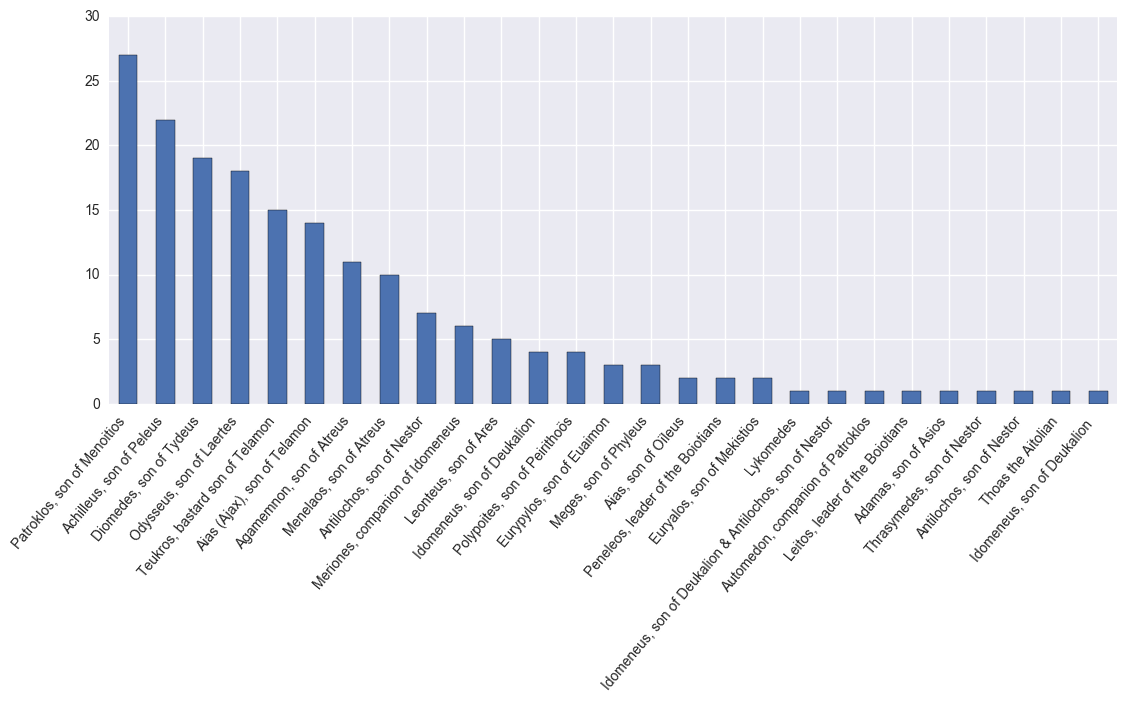

In [9]:
gkills = kills[kills.Winner.str.contains('G')]
g1 = gkills['Combatant1'][gkills.C1_Faction.str.contains('G')]
g2 = gkills['Combatant2'][gkills.C2_Faction.str.contains('G')]
gkill_list = pd.concat([g1,g2])
gkill_list.value_counts().plot(kind='bar')
xticks(rotation = 50, ha = 'right')

In [10]:
print len(gkill_list[gkill_list.str.contains('Patroklos')])
print len(gkill_list[gkill_list.str.contains('Achilleus')])

28
22


The first surprising result of this plot I notice is that Achilles, the star of the show, doesn't have the most kills. It's Patroklos, his friend, who killed the most Trojans. Most of his kills are during his rampage in Book 16, before he is killed by Hector at the end of the chapter.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

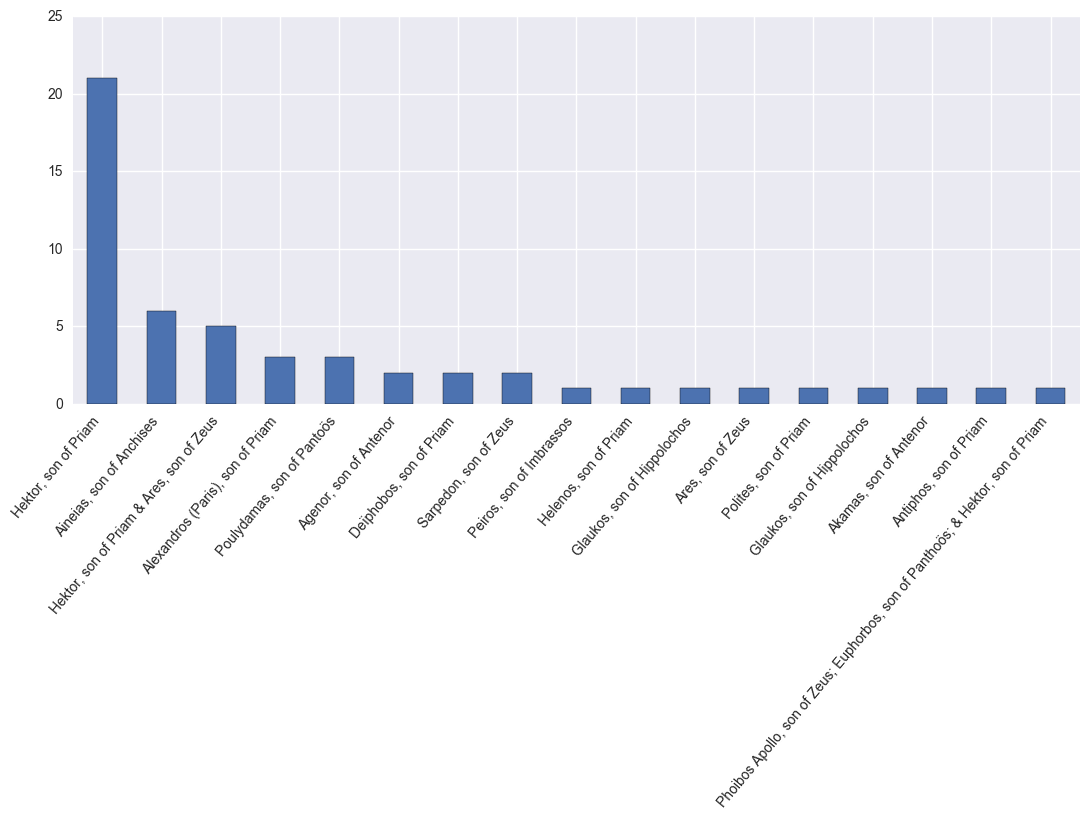

In [11]:
tkills = kills[kills.Winner.str.contains('T')]
t1 = tkills['Combatant1'][tkills.C1_Faction.str.contains('T')]
t2 = tkills['Combatant2'][tkills.C2_Faction.str.contains('T')]
tkill_list = pd.concat([t1,t2])
tkill_list.value_counts().plot(kind='bar')
xticks(rotation = 50, ha = 'right')

In [12]:
gkills.head()

,Combatant1,Combatant2,C1_Faction,C2_Faction,Winner,Loser_Killed,Iliad_loc,Notes
1,"Antilochos, son of Nestor","Echepolos, son of Thalysias",G,T,G,yes,4.457,Echepolos killed by spear to the forehead (4.4...
3,"Aias (Ajax), son of Telamon","Simoeisios, son of Anthemion",G,T,G,yes,4.479,Simoeisios killed by spear to the right chest ...
5,"Odysseus, son of Laertes","Demokoön, bastard son of Priam",G,T,G,yes,4.499,Demokoön killed by spear to the temple (4.499-...
7,Thoas the Aitolian,"Peiros, son of Imbrassos",G,T,G,yes,4.527,"Peiros wounded by spear to the lung, then kill..."
8,"Diomedes, son of Tydeus","Phegeus, son of Dares",G,T,G,yes,5.009,Phegeus killed by spear to the chest (5.9-20)


In [13]:
df[['Combatant1', 'Combatant2']].head()

,Combatant1,Combatant2
0,"Menelaos, son of Atreus","Alexandros (Paris), son of Priam"
1,"Antilochos, son of Nestor","Echepolos, son of Thalysias"
2,"Elephanor, leader of the Abantes","Agenor, son of Antenor"
3,"Aias (Ajax), son of Telamon","Simoeisios, son of Anthemion"
4,"Antiphos, son of Priam","Leukos, companion of Odysseus"


In [14]:
# convert line locations into line ratios where 
# e.g. 1.5 refers to halfway through the first chapter
def line_ratio(lineloc):
    chapter = int(lineloc // 1)
    line = (lineloc - chapter) * 1000
    tot_lines = [611,877,461,544,909,
        529,482,565,714,579,
        848,471,837,522,725,
        867,761,617,417,503,
        611,516,898,804]
    return chapter + line / tot_lines[chapter-1]

df['line_ratios'] = df.Iliad_loc.apply(line_ratio)
#df.head()

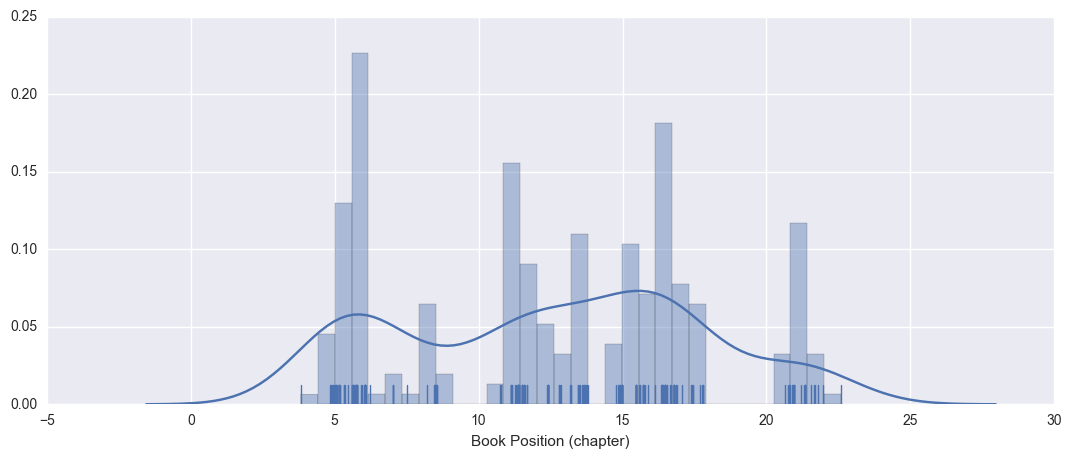

In [16]:
#df.line_ratios.plot(kind='density', rug=True)
a = sns.distplot(df.line_ratios, kde=True, rug=True, bins=32)
a.set(xlabel = 'Book Position (chapter)')
plt.show()